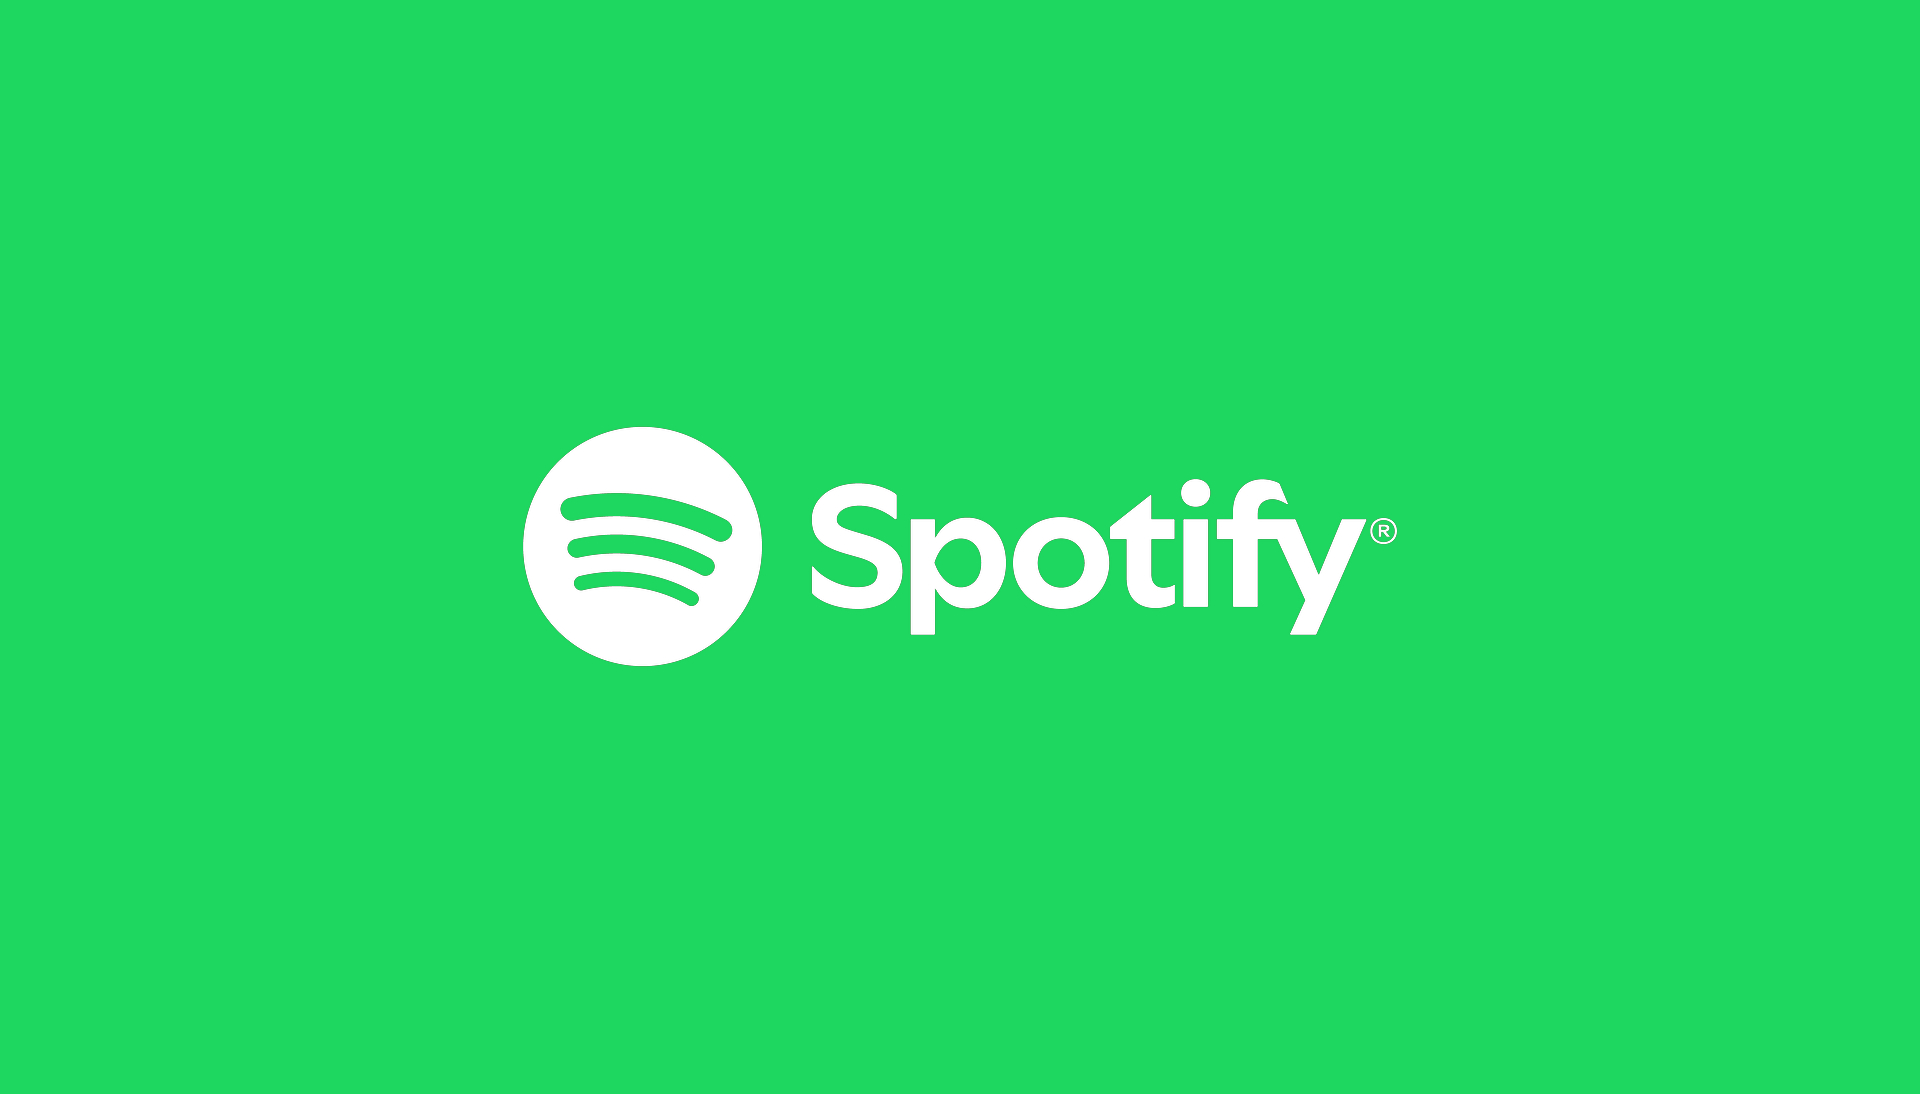

In [1]:
from IPython.display import Image
Image(filename=r'D:\Ammar\AMIT Diploma\Machine Leaning\session7\2024-spotify-brand-assets-media-kit.jpg')

<div class="alert alert-block alert-success">
    <h1> 1-Understand the data :</h1>
    
- Upload the data and take a look of columns and data types
- Identfy the target Label
    
</div>

## Import Libraries

In [2]:
# Importing Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import warnings
import plotly.express as px
import plotly.io as pio
warnings.filterwarnings('ignore')

# Importing Machine Learning Library
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
df=pd.read_csv(r'D:\Ammar\AMIT Diploma\Machine Leaning\session7\Spotify Most Streamed Songs.csv')

### Data Card:

*   **track_name:** Name of the song.
*   **artist(s)_name:** Name of the artist(s) of the song.
*   **artist_count:** Number of artists contributing to the song.
*   **released_year:** Year when the song was released.
*   **released_month:** Month when the song was released.
*   **released_day:** Day of the month when the song was released.
*   **in_spotify_playlists:** Number of Spotify playlists the song is included in.
*   **in_spotify_charts:** Presence and rank of the song on Spotify charts (target).
*   **streams:** Total number of streams on Spotify
*   **in_apple_playlists:** Number of Apple Music playlists the song is included in
*   **in_apple_charts:** Presence and rank of the song on Apple Music charts
*   **in_deezer_playlists:** Number of Deezer playlists the song is included in
*   **in_deezer_charts:** Presence and rank of the song on Deezer charts
*   **in_shazam_charts:** Presence and rank of the song on Shazam charts
*   **bpm:** Beats per minute, a measure of song tempo
*   **key:** Key of the song
*   **mode:** Mode of the song (major or minor)
*   **danceability_%:** Percentage indicating how suitable the song is for dancing
*  **valence_%:** Positivity of the song's musical content
*   **energy_%:** Perceived energy level of the song
*   **acousticness_%:** Amount of acoustic sound in the song
*   **instrumentalness_%:** Amount of instrumental content in the song
*   **liveness_%:** Presence of live performance elements
*   **speechiness_%:** Amount of spoken words in the song













## Data size:
- how much the data size (columns and rows)
- shape function return the number of columns and rows

In [4]:
df.shape

(953, 25)

## Data Preview:
- in this step we want to see how data Looks like
- head() display the first few rows of the dataset
- sample() display random sample of the dataset

In [5]:
df.head(7)

track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           2019               8            23   
4             1           2023               5            18   
5             2           2023               6             1   
6             2           2023               3            16   

   in_spotify_playlists  in_spotify_charts    streams  in_apple_playlists  \
0                   553                147  141381703                  43   
1                  1474                 48  133716286                  48   
2                  1397                113  140003974                  94   
3                  7858                100  800840817                 116   
4                  3133                 50  303236322                  84   
5                  2186                 91  183706234                  67   
6                  3090                 50  725980112                  34   

   ...  key   mode  danceability_% valence_%  energy_% acousticness_%  \
0  ...    B  Major              80        89        83             31   
1  ...   C#  Major              71        61        74              7   
2  ...    F  Major              51        32        53             17   
3  ...    A  Major              55        58        72             11   
4  ...    A  Minor              65        23        80             14   
5  ...   C#  Major              92        66        58             19   
6  ...    F  Minor              67        83        76             48   

  instrumentalness_%  liveness_%  speechiness_%  \
0                  0           8              4   
1                  0          10              4   
2                  0          31              6   
3                  0          11             15   
4                 63          11              6   
5                  0           8             24   
6                  0           8              3   

                                           cover_url  
0                                          Not Found  
1  https://i.scdn.co/image/ab67616d0000b2730656d5...  
2  https://i.scdn.co/image/ab67616d0000b273e85259...  
3  https://i.scdn.co/image/ab67616d0000b273e787cf...  
4  https://i.scdn.co/image/ab67616d0000b273ab5c9c...  
5  https://i.scdn.co/image/ab67616d0000b273e3a09a...  
6  https://i.scdn.co/image/ab67616d0000b2732071a0...  

[7 rows x 25 columns]

In [6]:
df.sample(7)

track_name                  artist(s)_name  \
728                               Tom's Diner  AnnenMayKantereit, Giant Rooks   
887                           ALIEN SUPERSTAR                        Beyoncï¿   
412                                  Atlantis                         Seafret   
812                     I Tried to Tell Y'all            Ugly Dray, Tesla Jnr   
555                                    Dakiti          Bad Bunny, Jhay Cortez   
681                                 Worst Day                          Future   
459  A Holly Jolly Christmas - Single Version                       Burl Ives   

     artist_count  released_year  released_month  released_day  \
728             2           2019               6            28   
887             1           2022               7            29   
412             1           2015               4            22   
812             2           2022               5             6   
555             2           2020              10            30   
681             1           2022               2            11   
459             1           1952               1             1   

     in_spotify_playlists  in_spotify_charts     streams  in_apple_playlists  \
728                  2605                  0   236872197                  15   
887                  2688                  0   171788484                  39   
412                  3045                  6   571386359                  43   
812                  1657                  0   121077868                  15   
555                 11215                 21  1763363713                 189   
681                   910                  0    50746620                  20   
459                  7930                  0   395591396                 108   

     ...  key   mode  danceability_% valence_%  energy_% acousticness_%  \
728  ...   F#  Minor              68        33        43             38   
887  ...   A#  Minor              55        46        64              0   
412  ...   G#  Minor              40        23        48              5   
812  ...    B  Major              71        37        52             62   
555  ...    E  Minor              73        14        57             40   
681  ...   C#  Major              65        60        60             11   
459  ...  NaN  Major              67        81        36             64   

    instrumentalness_%  liveness_%  speechiness_%  \
728                  0          36             14   
887                  0          17             10   
412                  0          12              3   
812                  0          11             36   
555                  0          11              5   
681                  0          10             40   
459                  0          15              3   

                                             cover_url  
728  https://i.scdn.co/image/ab67616d0000b2732186eb...  
887                                          Not Found  
412  https://i.scdn.co/image/ab67616d0000b2738c3327...  
812                                          Not Found  
555  https://i.scdn.co/image/ab67616d0000b27334c819...  
681  https://i.scdn.co/image/ab67616d0000b2737e83b7...  
459  https://i.scdn.co/image/ab67616d0000b273b9b921...  

[7 rows x 25 columns]

## Data Types:
- Use `info()` to get dataset details.
- Use dtypes to determine each column's data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [8]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object

- We can drop the `cover_url column` as it does not affect the target column.
- Drop the `released_month` and `released_day` columns, as the `released_year` column already contains the relevant release data for the song.
- There are null values in `in_shazam_charts`,and `key`.
- The object data type should be converted to category for better handling.
- We should also apply label encoding to these categorical data.

In [9]:
cols_to_drop = ['cover_url', 'released_month', 'released_day']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

- Modifiy column names for a more formal presentation.

In [10]:
df.columns = ['Track_Name', 'Artist_Name', 'Artist_Count', 'Released_Year',
       'In_Spotify_Playlists', 'In_Spotify_Charts', 'Streams',
       'In_Apple_Playlists', 'In_Apple_Charts', 'In_Deezer_Playlists',
       'In_Deezer_Charts', 'In_Shazam_Charts', 'BPM', 'Key', 'Mode',
       'Danceability', 'Valence', 'Energy', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Speechiness']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Track_Name            953 non-null    object
 1   Artist_Name           953 non-null    object
 2   Artist_Count          953 non-null    int64 
 3   Released_Year         953 non-null    int64 
 4   In_Spotify_Playlists  953 non-null    int64 
 5   In_Spotify_Charts     953 non-null    int64 
 6   Streams               953 non-null    object
 7   In_Apple_Playlists    953 non-null    int64 
 8   In_Apple_Charts       953 non-null    int64 
 9   In_Deezer_Playlists   953 non-null    object
 10  In_Deezer_Charts      953 non-null    int64 
 11  In_Shazam_Charts      903 non-null    object
 12  BPM                   953 non-null    int64 
 13  Key                   858 non-null    object
 14  Mode                  953 non-null    object
 15  Danceability          953 non-null    in

### Change In-correct Datatypes

In [12]:
cols = ["Track_Name", "Artist_Name", "Streams",'In_Deezer_Playlists','In_Shazam_Charts', 'Key','Mode']
df[cols] = df[cols].astype('category')
pd.DataFrame(df.dtypes).T

Track_Name Artist_Name Artist_Count Released_Year In_Spotify_Playlists  \
0   category    category        int64         int64                int64   

  In_Spotify_Charts   Streams In_Apple_Playlists In_Apple_Charts  \
0             int64  category              int64           int64   

  In_Deezer_Playlists  ...    BPM       Key      Mode Danceability Valence  \
0            category  ...  int64  category  category        int64   int64   

  Energy Acousticness Instrumentalness Liveness Speechiness  
0  int64        int64            int64    int64       int64  

[1 rows x 22 columns]

## Missing Values:
- Check for nulls or missing values.
- Use `isnull().sum()` to get the total number of missing values per column.

In [13]:
df.isnull().sum()

Track_Name               0
Artist_Name              0
Artist_Count             0
Released_Year            0
In_Spotify_Playlists     0
In_Spotify_Charts        0
Streams                  0
In_Apple_Playlists       0
In_Apple_Charts          0
In_Deezer_Playlists      0
In_Deezer_Charts         0
In_Shazam_Charts        50
BPM                      0
Key                     95
Mode                     0
Danceability             0
Valence                  0
Energy                   0
Acousticness             0
Instrumentalness         0
Liveness                 0
Speechiness              0
dtype: int64

### Ratio of nulls to the original data:

In [14]:
nulls=df.isnull().sum()
ratio=(nulls/df.shape[0])*100
ratio

Track_Name              0.00000
Artist_Name             0.00000
Artist_Count            0.00000
Released_Year           0.00000
In_Spotify_Playlists    0.00000
In_Spotify_Charts       0.00000
Streams                 0.00000
In_Apple_Playlists      0.00000
In_Apple_Charts         0.00000
In_Deezer_Playlists     0.00000
In_Deezer_Charts        0.00000
In_Shazam_Charts        5.24659
BPM                     0.00000
Key                     9.96852
Mode                    0.00000
Danceability            0.00000
Valence                 0.00000
Energy                  0.00000
Acousticness            0.00000
Instrumentalness        0.00000
Liveness                0.00000
Speechiness             0.00000
dtype: float64

- **key:** 95 nulls of 953 which represent 10% of the `key` column, since `key` column is a catgorical feature decide to replace nulls with mode value.
- **in_shazam_charts:** 50 nulls of 953 which represent 5% of the `in_shazam_charts` column, since `in_shazam_charts` is a catgorical column decide to replace nulls with mode.

### Handling Missing Values

- ##### Fill the missing values with `mode` values since it's catgorical data:


In [15]:
columns_with_missing_values = ['Key', 'In_Shazam_Charts'] # cols with missing values

for column in columns_with_missing_values:
    mode_value = df[column].mode()[0] # get the mode for each column
    df[column].fillna(mode_value, inplace=True) # Fill missing values with the mode

- Ensure Missing values are removed successfully

In [16]:
df.isnull().sum()

Track_Name              0
Artist_Name             0
Artist_Count            0
Released_Year           0
In_Spotify_Playlists    0
In_Spotify_Charts       0
Streams                 0
In_Apple_Playlists      0
In_Apple_Charts         0
In_Deezer_Playlists     0
In_Deezer_Charts        0
In_Shazam_Charts        0
BPM                     0
Key                     0
Mode                    0
Danceability            0
Valence                 0
Energy                  0
Acousticness            0
Instrumentalness        0
Liveness                0
Speechiness             0
dtype: int64

- Convert text to numbers for analysis.
- I prefer to create new columns for label encoding to retain the original text for visualization purposes.

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['Track_Name', 'Artist_Name','Key', 'Mode']:
  df[col + '_encoded'] = le.fit_transform(df[col])

df.head()

Track_Name       Artist_Name  Artist_Count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   Released_Year  In_Spotify_Playlists  In_Spotify_Charts    Streams  \
0           2023                   553                147  141381703   
1           2023                  1474                 48  133716286   
2           2023                  1397                113  140003974   
3           2019                  7858                100  800840817   
4           2023                  3133                 50  303236322   

   In_Apple_Playlists  In_Apple_Charts In_Deezer_Playlists  ...  Valence  \
0                  43              263                  45  ...       89   
1                  48              126                  58  ...       61   
2                  94              207                  91  ...       32   
3                 116              207                 125  ...       58   
4                  84              133                  87  ...       23   

  Energy  Acousticness Instrumentalness Liveness  Speechiness  \
0     83            31                0        8            4   
1     74             7                0       10            4   
2     53            17                0       31            6   
3     72            11                0       11           15   
4     80            14               63       11            6   

   Track_Name_encoded  Artist_Name_encoded  Key_encoded  Mode_encoded  
0                 687                  326            2             0  
1                 397                  401            3             0  
2                 936                  431            7             0  
3                 170                  558            0             0  
4                 864                   43            0             1  

[5 rows x 26 columns]

## Statistical Overview
- Obtain statistical measures of the data.
- The `describe()` function provides statistical measures for each column.

In [18]:
df.describe().T

count         mean          std     min     25%     50%  \
Artist_Count          953.0     1.556139     0.893044     1.0     1.0     1.0   
Released_Year         953.0  2018.238195    11.116218  1930.0  2020.0  2022.0   
In_Spotify_Playlists  953.0  5200.124869  7897.608990    31.0   875.0  2224.0   
In_Spotify_Charts     953.0    12.009444    19.575992     0.0     0.0     3.0   
In_Apple_Playlists    953.0    67.812172    86.441493     0.0    13.0    34.0   
In_Apple_Charts       953.0    51.908709    50.630241     0.0     7.0    38.0   
In_Deezer_Charts      953.0     2.666317     6.035599     0.0     0.0     0.0   
BPM                   953.0   122.540399    28.057802    65.0   100.0   121.0   
Danceability          953.0    66.969570    14.630610    23.0    57.0    69.0   
Valence               953.0    51.431270    23.480632     4.0    32.0    51.0   
Energy                953.0    64.279119    16.550526     9.0    53.0    66.0   
Acousticness          953.0    27.057712    25.996077     0.0     6.0    18.0   
Instrumentalness      953.0     1.581322     8.409800     0.0     0.0     0.0   
Liveness              953.0    18.213012    13.711223     3.0    10.0    12.0   
Speechiness           953.0    10.131165     9.912888     2.0     4.0     6.0   
Track_Name_encoded    953.0   470.536201   272.027590     0.0   235.0   471.0   
Artist_Name_encoded   953.0   322.391396   187.819836     0.0   159.0   319.0   
Key_encoded           953.0     4.938090     3.132130     0.0     3.0     4.0   
Mode_encoded          953.0     0.422875     0.494275     0.0     0.0     0.0   

                         75%      max  
Artist_Count             2.0      8.0  
Released_Year         2022.0   2023.0  
In_Spotify_Playlists  5542.0  52898.0  
In_Spotify_Charts       16.0    147.0  
In_Apple_Playlists      88.0    672.0  
In_Apple_Charts         87.0    275.0  
In_Deezer_Charts         2.0     58.0  
BPM                    140.0    206.0  
Danceability            78.0     96.0  
Valence                 70.0     97.0  
Energy                  77.0     97.0  
Acousticness            43.0     97.0  
Instrumentalness         0.0     91.0  
Liveness                24.0     97.0  
Speechiness             11.0     64.0  
Track_Name_encoded     705.0    942.0  
Artist_Name_encoded    498.0    644.0  
Key_encoded              8.0     10.0  
Mode_encoded             1.0      1.0

## Duplicated Data  
- Check for and remove duplicated values  
- Use `duplicated().sum()` to identify duplicates

In [19]:
df.duplicated().sum()

0

- No duplicated data is found

## Exploring Diversity:
- Determine the number of unique values in the dataset.
- Use `nunique()` to return the count of unique values.

In [20]:
df.nunique()

Track_Name              943
Artist_Name             645
Artist_Count              8
Released_Year            50
In_Spotify_Playlists    879
In_Spotify_Charts        82
Streams                 949
In_Apple_Playlists      234
In_Apple_Charts         172
In_Deezer_Playlists     348
In_Deezer_Charts         34
In_Shazam_Charts        198
BPM                     124
Key                      11
Mode                      2
Danceability             72
Valence                  94
Energy                   80
Acousticness             98
Instrumentalness         39
Liveness                 68
Speechiness              48
Track_Name_encoded      943
Artist_Name_encoded     645
Key_encoded              11
Mode_encoded              2
dtype: int64

- check the value counts of the data

## Correlation Analysis:
- Evaluate the correlation between features and the target label.
- Use `corr()` to compute the correlation matrix.

In [21]:
num_data=df.select_dtypes('number')
corr_matrix=num_data.corr()
corr_matrix

Artist_Count  Released_Year  In_Spotify_Playlists  \
Artist_Count              1.000000       0.087586             -0.101966   
Released_Year             0.087586       1.000000             -0.392204   
In_Spotify_Playlists     -0.101966      -0.392204              1.000000   
In_Spotify_Charts        -0.018507       0.069678              0.164331   
In_Apple_Playlists       -0.051074      -0.198998              0.708277   
In_Apple_Charts          -0.088597      -0.035842              0.271317   
In_Deezer_Charts         -0.003732       0.095389              0.144342   
BPM                      -0.038375      -0.005334             -0.019598   
Danceability              0.207027       0.187333             -0.106534   
Valence                   0.127960      -0.059355             -0.021883   
Energy                    0.137096       0.095226              0.033808   
Acousticness             -0.101061      -0.124156             -0.064421   
Instrumentalness         -0.050225      -0.014562             -0.028134   
Liveness                  0.042730      -0.005819             -0.046695   
Speechiness               0.119900       0.133819             -0.089722   
Track_Name_encoded       -0.019886       0.007225              0.048093   
Artist_Name_encoded      -0.073731       0.060136             -0.069095   
Key_encoded              -0.028236      -0.014148              0.001390   
Mode_encoded              0.094893       0.089473             -0.048868   

                      In_Spotify_Charts  In_Apple_Playlists  In_Apple_Charts  \
Artist_Count                  -0.018507           -0.051074        -0.088597   
Released_Year                  0.069678           -0.198998        -0.035842   
In_Spotify_Playlists           0.164331            0.708277         0.271317   
In_Spotify_Charts              1.000000            0.233354         0.552232   
In_Apple_Playlists             0.233354            1.000000         0.414523   
In_Apple_Charts                0.552232            0.414523         1.000000   
In_Deezer_Charts               0.600205            0.369032         0.383668   
BPM                            0.034713            0.023725         0.030962   
Danceability                   0.030071           -0.025326        -0.025204   
Valence                        0.035531            0.057075         0.047733   
Energy                         0.081920            0.052615         0.104828   
Acousticness                  -0.054987           -0.061781        -0.076793   
Instrumentalness              -0.010146           -0.057219        -0.013145   
Liveness                      -0.047552           -0.049596        -0.018733   
Speechiness                   -0.081765           -0.108011        -0.151539   
Track_Name_encoded             0.002285           -0.003700         0.031703   
Artist_Name_encoded           -0.025857           -0.055308        -0.057554   
Key_encoded                   -0.021970           -0.000571        -0.013747   
Mode_encoded                   0.036389           -0.055004         0.023077   

                      In_Deezer_Charts       BPM  Danceability   Valence  \
Artist_Count                 -0.003732 -0.038375      0.207027  0.127960   
Released_Year                 0.095389 -0.005334      0.187333 -0.059355   
In_Spotify_Playlists          0.144342 -0.019598     -0.106534 -0.021883   
In_Spotify_Charts             0.600205  0.034713      0.030071  0.035531   
In_Apple_Playlists            0.369032  0.023725     -0.025326  0.057075   
In_Apple_Charts               0.383668  0.030962     -0.025204  0.047733   
In_Deezer_Charts              1.000000  0.028036      0.070913  0.076196   
BPM                           0.028036  1.000000     -0.147095  0.041195   
Danceability                  0.070913 -0.147095      1.000000  0.408451   
Valence                       0.076196  0.041195      0.408451  1.000000   
Energy                        0.094627  0.025794      0.198095  0.357612   
Acoustic

# Outliers

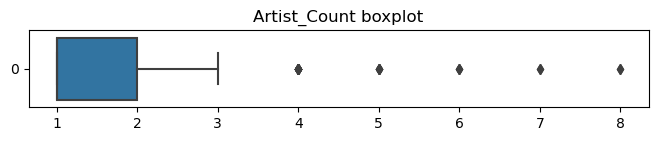

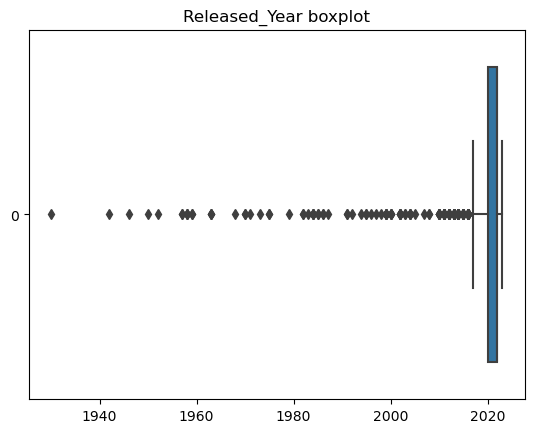

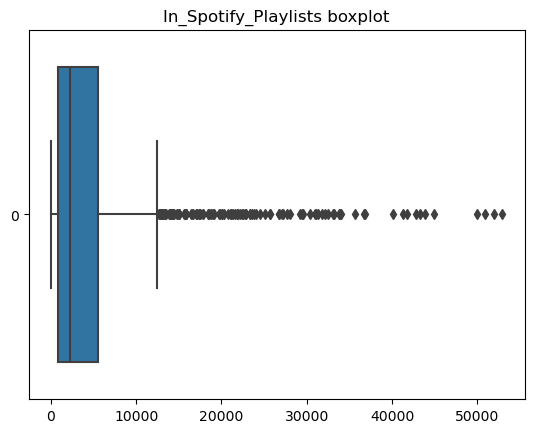

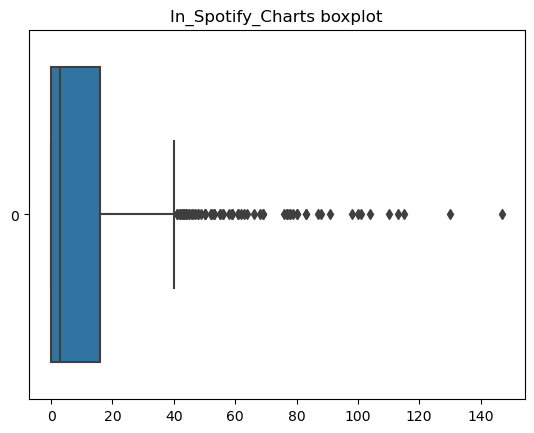

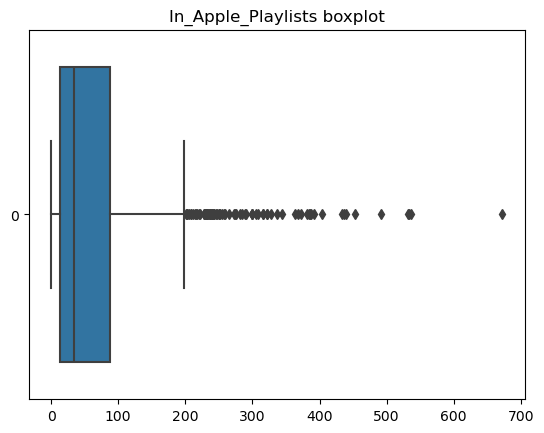

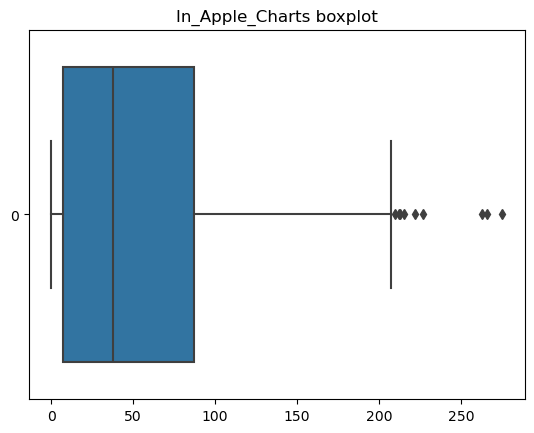

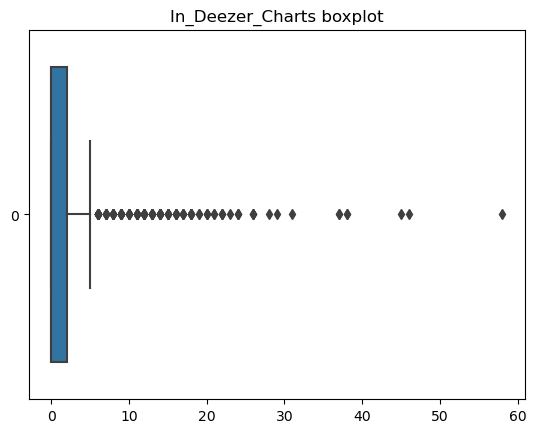

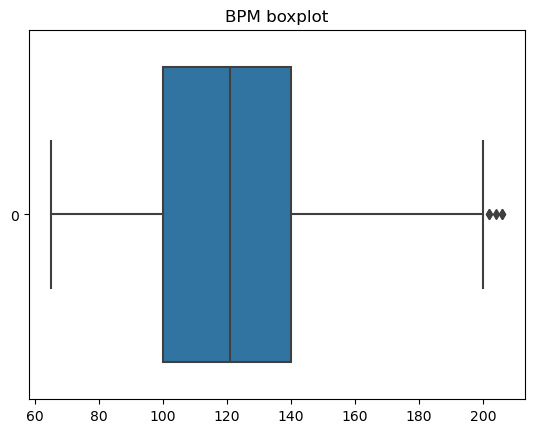

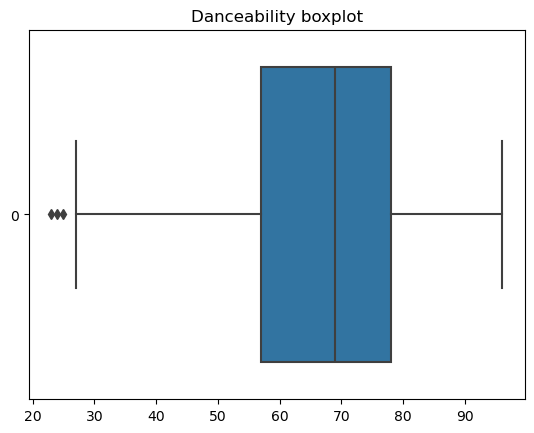

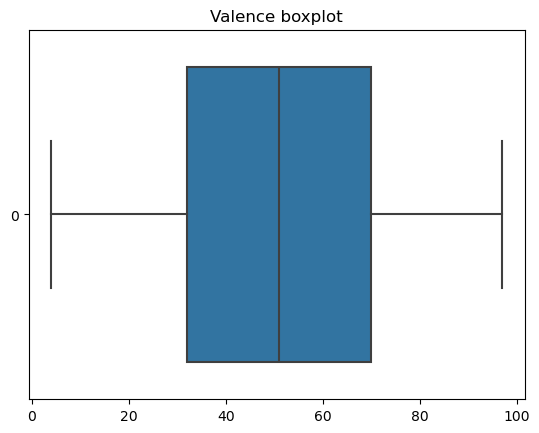

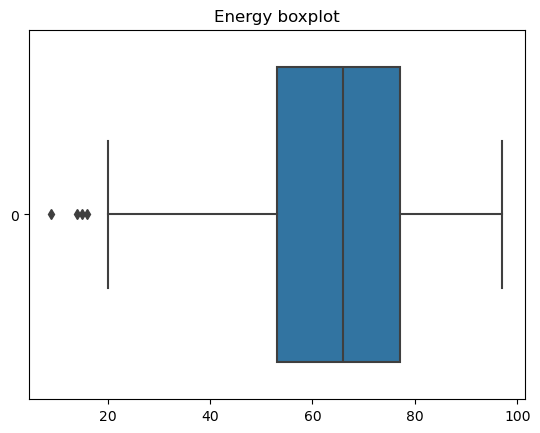

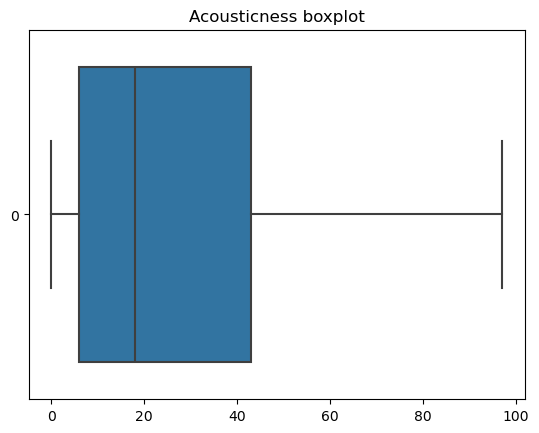

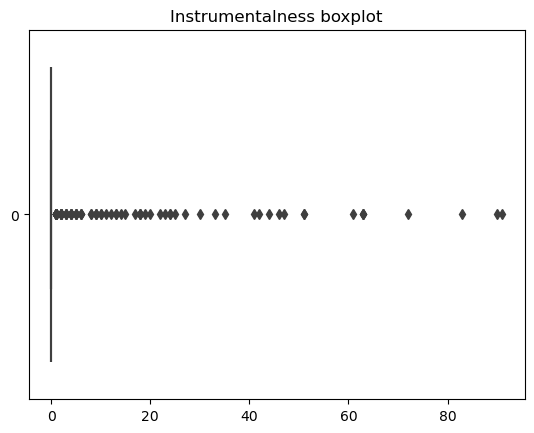

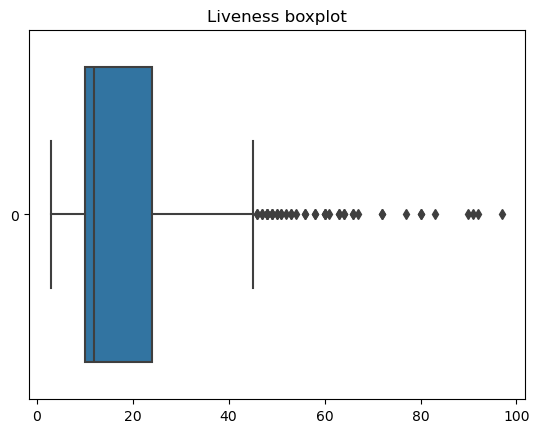

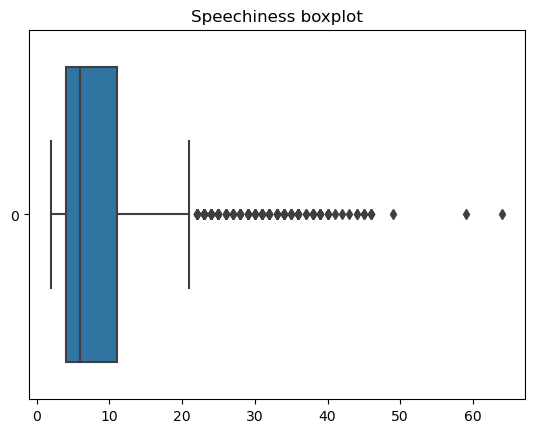

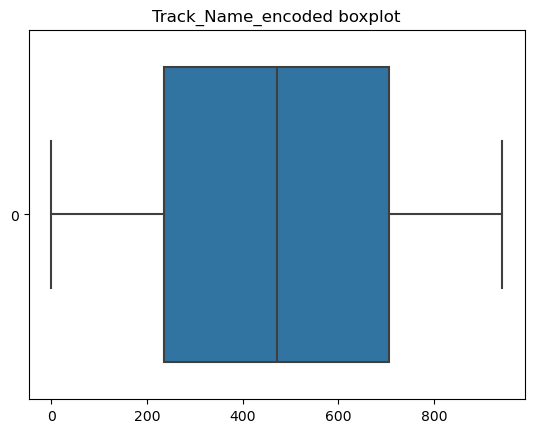

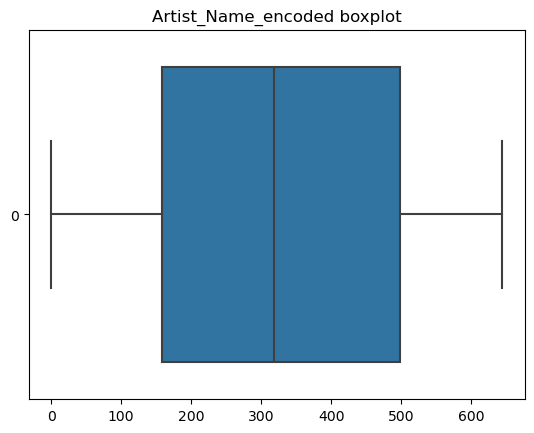

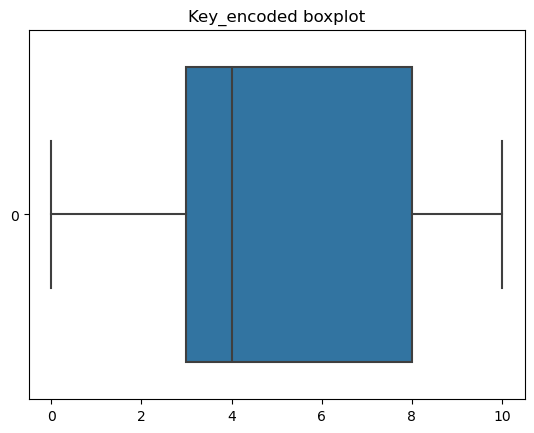

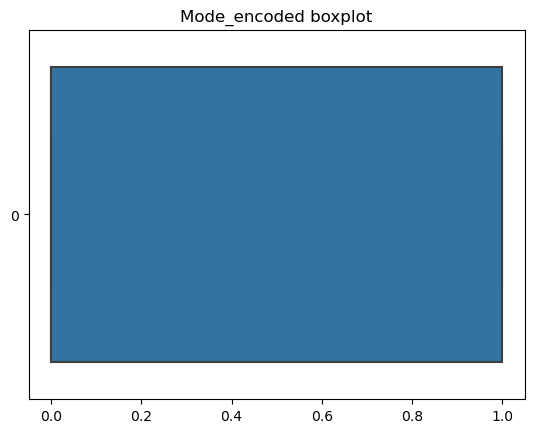

In [22]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for col in num_cols:
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

## Handle outliers


In [23]:
num_cols=['Artist_Count','Released_Year','In_Spotify_Playlists'
          ,'In_Spotify_Charts','Streams','In_Apple_Playlists'
          ,'In_Apple_Charts','In_Deezer_Charts',
          'Instrumentalness','Liveness','Speechiness']

for col in num_cols:
    #Check to make sure the column is numeric
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        Lower_Fence = Q1 - 1.5 * IQR
        Upper_Fence = Q3 + 1.5 * IQR
        Lower_Outliers = df[df[col] < Lower_Fence][col].values
        Upper_Outliers = df[df[col] > Upper_Fence][col].values
        df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
        df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

- **Ensure outliers has been removed:**

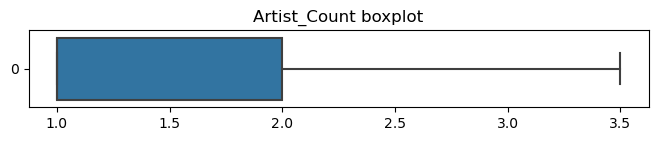

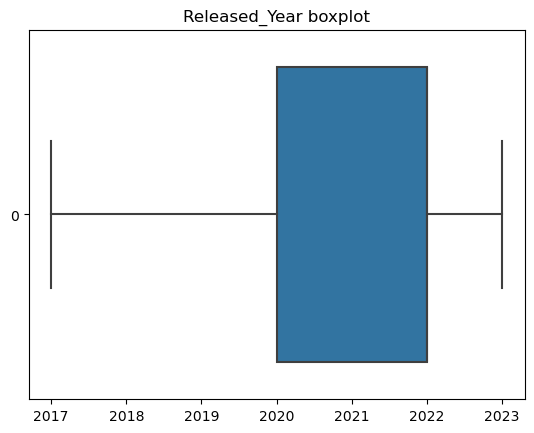

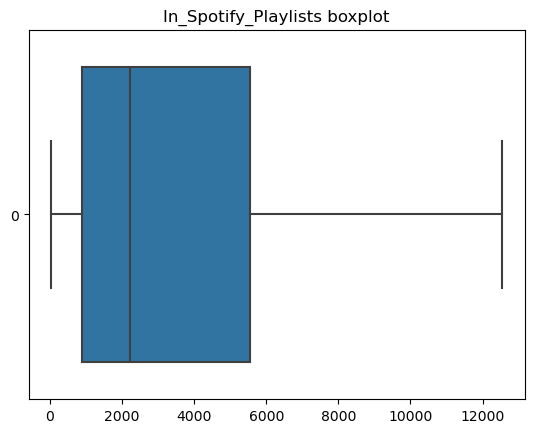

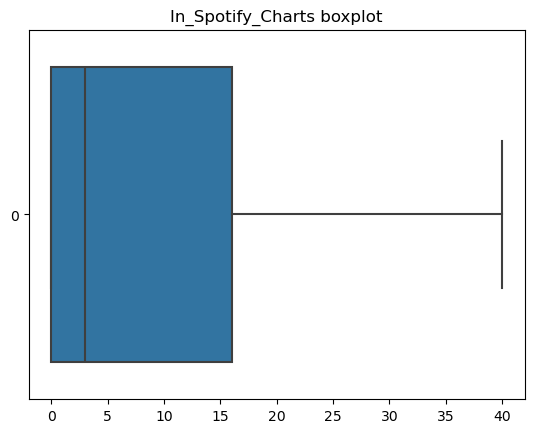

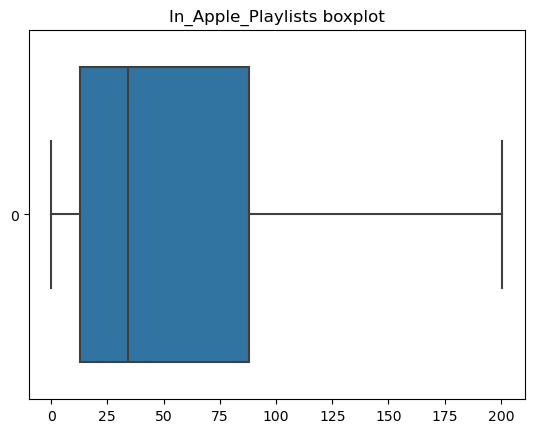

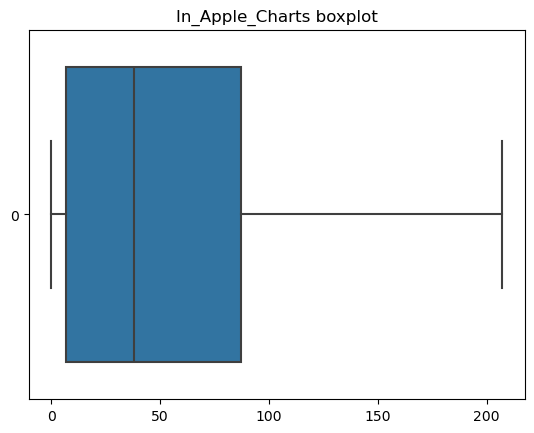

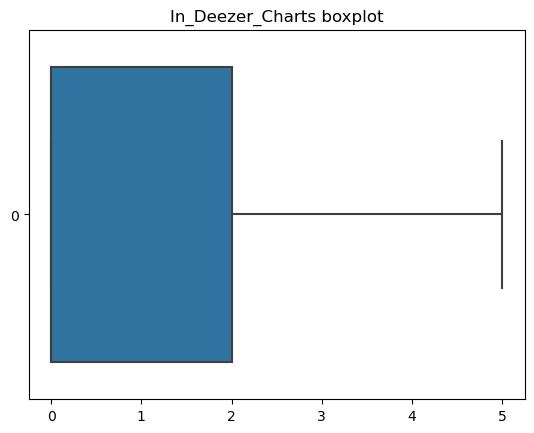

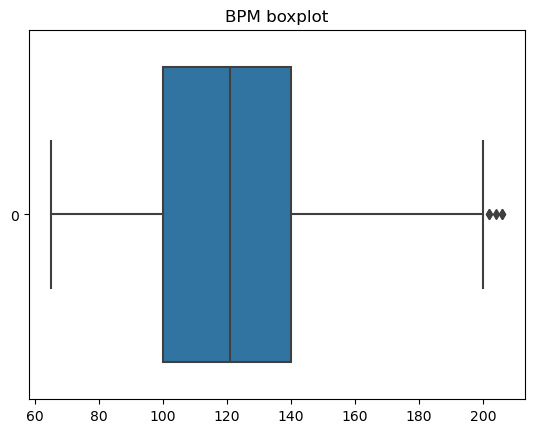

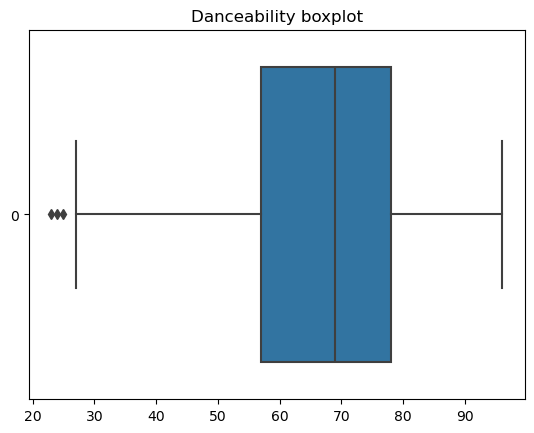

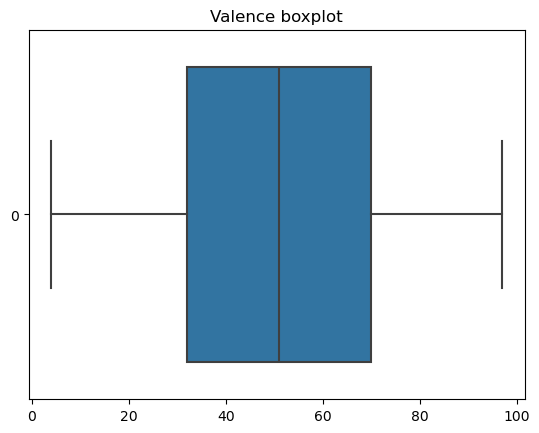

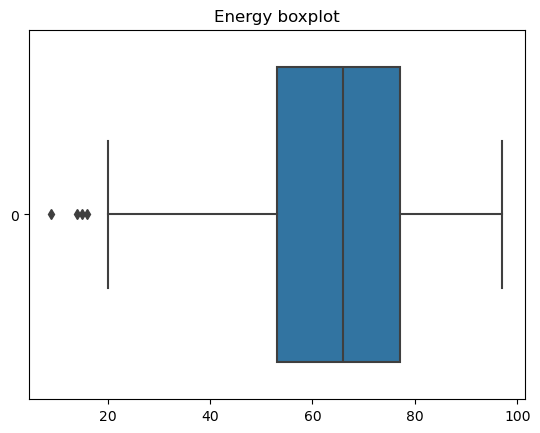

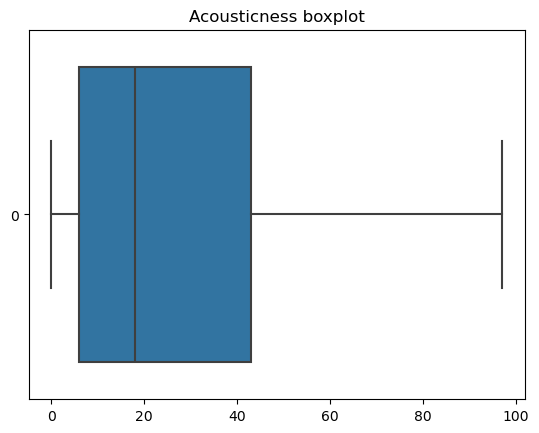

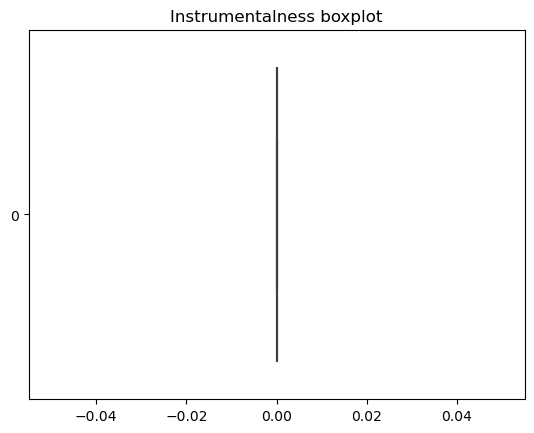

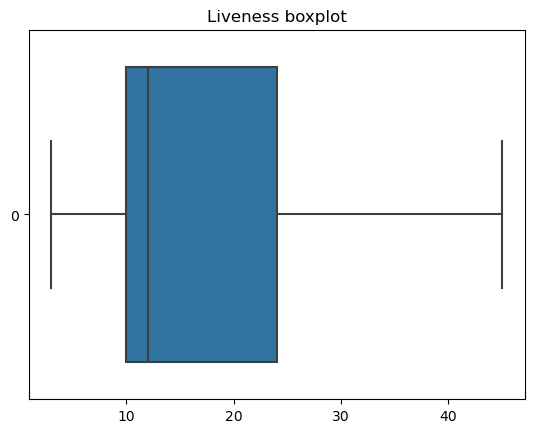

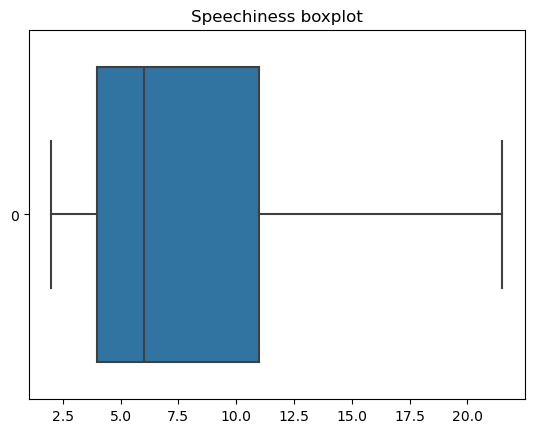

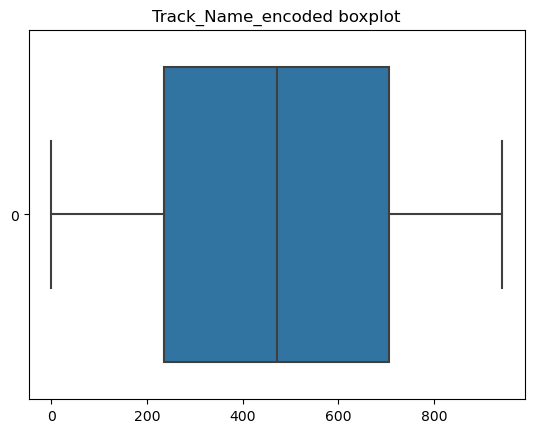

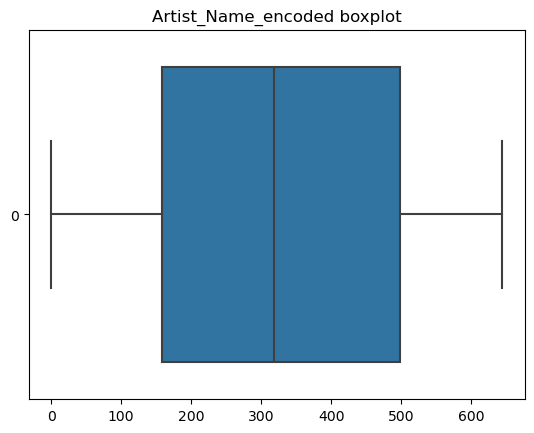

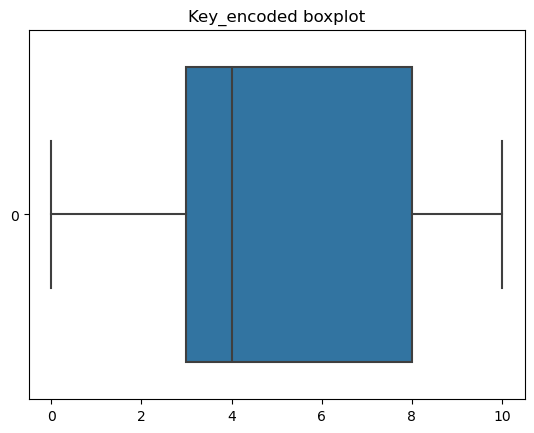

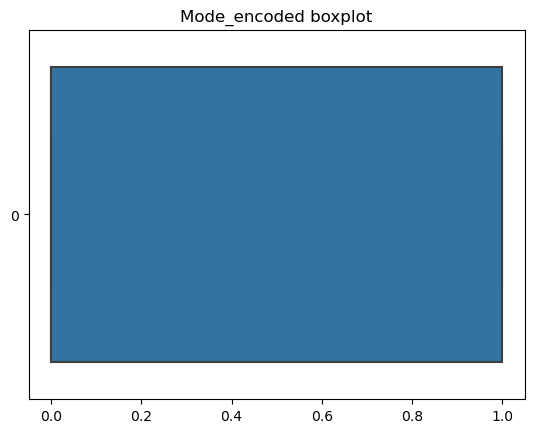

In [24]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(8, 1))
for col in num_cols:
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} boxplot")
    plt.show()

<div class="alert alert-block alert-info">
    <h1> 2-Visulaization :</h1>
    
- Visualization allows us to quickly grasp complex data by presenting it in a visual format, making it easier to identify patterns, trends, and outliers that may not be apparent in raw data

</div>

### **a. BarPlot**
- using Bar Plot to show Top 10 Most Streamed Songs overtime
- using Bar Plot to show Total Streams per Year
- using Bar Plot to show Top 10 Artists by Total Streams

In [25]:
#using Bar Plot to show Top 10 Most Streamed Songs overtime
top_songs = df.sort_values(by='Streams', ascending=False).head(10)
px.bar(top_songs, y = 'Streams' , x ='Track_Name',title='Top 10 Most Streamed Songs')


In [26]:
top_songs

Track_Name                    Artist_Name  \
574    Love Grows (Where My Rosemary Goes)              Edison Lighthouse   
33                               Anti-Hero                   Taylor Swift   
625                                 Arcade                Duncan Laurence   
253                          Glimpse of Us                           Joji   
455                         Seek & Destroy                            SZA   
98                      Summertime Sadness                   Lana Del Rey   
891  Come Back Home - From "Purple Hearts"                   Sofia Carson   
427                      Where Are You Now  Lost Frequencies, Calum Scott   
322                          I Love You So                    The Walters   
130                              Queencard                       (G)I-DLE   

     Artist_Count  Released_Year  In_Spotify_Playlists  In_Spotify_Charts  \
574           1.0           2017                2877.0                  0   
33            1.0           2022                9082.0                 40   
625           1.0           2019                6646.0                  0   
253           1.0           2022                6330.0                  6   
455           1.0           2022                1007.0                  0   
98            1.0           2017               12542.5                 40   
891           1.0           2022                 367.0                  0   
427           2.0           2021               10565.0                 40   
322           1.0           2017                7536.0                  7   
130           1.0           2023                 451.0                 33   

                                               Streams  In_Apple_Playlists  \
574  BPM110KeyAModeMajorDanceability53Valence75Ener...                16.0   
33                                           999748277               200.5   
625                                          991336132               107.0   
253                                          988515741               109.0   
455                                           98709329                 5.0   
98                                           983637508                89.0   
891                                           97610446                28.0   
427                                          972509632               200.5   
322                                          972164968                44.0   
130                                           96273746                10.0   

     In_Apple_Charts In_Deezer_Playlists  ...  Valence Energy  Acousticness  \
574                0                  54  ...       75     69             7   
33               142                 165  ...       51     63            12   
625               47                 584  ...       27     33            82   
253               42                 158  ...       27     32            89   
455               31                   1  ...       35     65            44   
98               143               1,632  ...       24     66             7   
891               67                 195  ...       43     53            24   
427              122                 557  ...       26     64            52   
322               19                 135  ...       46     67            65   
130              126                   7  ...       69     83             3   

    Instrumentalness Liveness  Speechiness  Track_Name_encoded  \
574                0       17          3.0                 447   
33                 0       19          5.0                  53   
625                0       14          4.0                  57   
253                0       14          5.0                 300   
455                0       21          7.0                 680   
98                 0       12          3.0                 752   
891                0       12          4.0                 157   
427                0       17         10.0                 881   
322          

A strange text in row 574 of the stream column prompted the decision to change it to the mode.

In [27]:
# Convert the 'streams' column to numeric, handling errors
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')

# Calculate the mode of the 'streams' column
mode_of_stream = df['Streams'].mode()[0]

# Now you should be able to change the value
index_to_change = 574 # number of row

# Use the mode value directly to update the 'streams' column at the specified index
df.loc[index_to_change, 'Streams'] = mode_of_stream
print(df.iloc[index_to_change])

Track_Name              Love Grows (Where My Rosemary Goes)
Artist_Name                               Edison Lighthouse
Artist_Count                                            1.0
Released_Year                                          2017
In_Spotify_Playlists                                 2877.0
In_Spotify_Charts                                         0
Streams                                         156338624.0
In_Apple_Playlists                                     16.0
In_Apple_Charts                                           0
In_Deezer_Playlists                                      54
In_Deezer_Charts                                          0
In_Shazam_Charts                                          0
BPM                                                     110
Key                                                       A
Mode                                                  Major
Danceability                                             53
Valence                                 

In [28]:
top_songs = df.sort_values(by='Streams', ascending=False).head(10)
px.bar(top_songs, y = 'Streams' , x ='Track_Name',title='Top 10 Most Streamed Songs')


In [29]:
#using Bar Plot to show Total Streams per Year
streams_per_year = df.groupby('Released_Year')['Streams'].sum().reset_index()
px.bar(streams_per_year, x='Released_Year', y='Streams',
              title='Total Streams per Year')

In [30]:
#using Bar Plot to show Top 10 Artists by Total Streams
top_artists = df.groupby('Artist_Name')['Streams'].sum().nlargest(10).reset_index()
px.bar(top_artists, x='Artist_Name', y='Streams',
               title='Top 10 Artists by Total Streams')

# **b.Heatmap:**
- using  heatmap to see the relationships between numerical variables such as `bpm`, `energy_%`, `danceability_%`, `valence_%`, and `streams`.


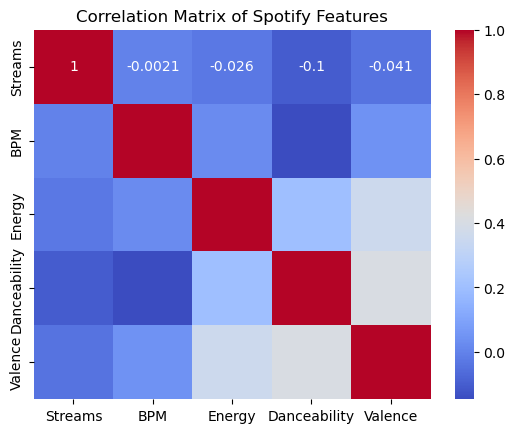

In [31]:
corr_matrix = df[['Streams', 'BPM', 'Energy', 'Danceability', 'Valence']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Features')
plt.show()


## c. ScatterPlot
- Using ScatterPlot to see diffrent relationships between features.

In [32]:
#using ScatterPlot to draw relationship between `danceability` and `energy`
px.scatter(df, x='Danceability', y='Energy',color='Mode',template='plotly_white',
           title='Danceability vs. Energy by Mode')

- we can notice there is a postive relationship between `energy_` and `danceability`

In [33]:
# using ScatterPlot to draw relationship between `acousticness` and `energy`
px.scatter(df, x='Acousticness', y='Energy',color='Mode',template='plotly_white',
           title='Acousticness vs. Energy by Mode')

- we can notice there is a negative relationship between `Acousticness` and `Energy`

In [34]:
# using ScatterPlot to draw relationship between `danceability` and `valence`
px.scatter(df, x='Danceability', y='Valence',color='Mode',template='plotly_white',
           title='Danceability vs. Valence by Mode')

- we can notice there is a Postive relationship between `Danceability` and `Valence`

## d.BoxPlot
- draw a Box Plot to see the distribution of song listens according to released_year.


In [35]:
px.box(df, x='Released_Year', y='Streams',title='Distribution of Streams by Release Year')

## e.Line Chart
- to show the evolution of the number of streams according to the year of release **released_year**


In [36]:
streams_per_year=df.groupby('Released_Year')['Streams'].sum().reset_index()
px.line(streams_per_year,x='Released_Year',y='Streams',title='Total Streams per Year')

## f.PieChart
- Using PieChart to show the distrbution of the stream based on `mode`.
- Using PieChart to show the distrbution of the stream based on `artist_count`.

In [37]:
#Using PieChart to show the distrbution of the stream based on artist_count.
artist_counts = df['Artist_Count'].value_counts()
px.pie(artist_counts, values=artist_counts.values, names=artist_counts.index
       , title='Distribution of Songs by Number of Contributing Artists')

In [38]:
#Using PieChart to show the distrbution of the stream based on mode.
mode_df = df['Mode'].value_counts().reset_index()
mode_df.columns = ['Mode', 'count']
px.pie(mode_df, values='count', names='Mode',
       title='Distribution of Songs by Mode (Major/Minor)')


## g.Word Cloud
- word cloud shows The most common words in song names


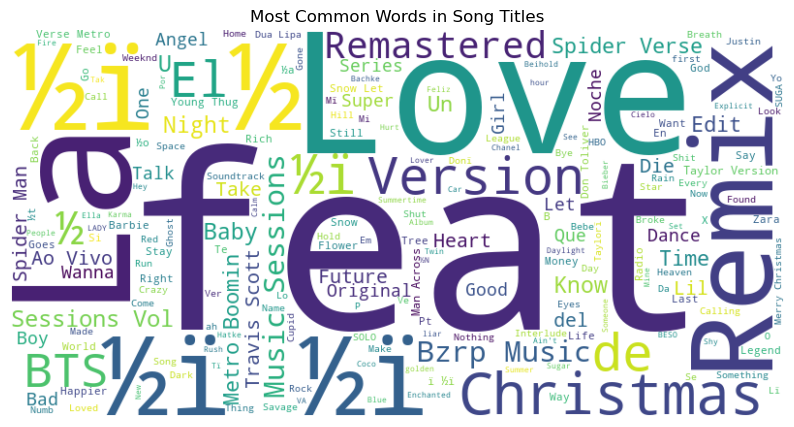

In [39]:
from wordcloud import WordCloud
fig=plt.figure(figsize=(10,10))
text = ' '.join(df['Track_Name'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Song Titles')
plt.show()


## h.HistoGram
- using histogram to see the Distribution of BPM

In [40]:
#using histogram to see the Distribution of BPM
px.histogram(df, x='BPM', nbins=30, title='Distribution of BPM (Beats Per Minute)')

# 3- Feature Engineering

- After analyzing the data and visualizations, choose `In_Spotify_Playlists` as the target column. This column will serve as the primary indicator of whether a track is featured in any Spotify playlists.

In [41]:
num_data=df.select_dtypes('number')
corr_matrix=num_data.corr()
corr_matrix

Artist_Count  Released_Year  In_Spotify_Playlists  \
Artist_Count              1.000000       0.193507             -0.115436   
Released_Year             0.193507       1.000000             -0.697140   
In_Spotify_Playlists     -0.115436      -0.697140              1.000000   
In_Spotify_Charts        -0.002054       0.028960              0.186672   
Streams                  -0.136120      -0.611577              0.837108   
In_Apple_Playlists       -0.047497      -0.419991              0.797119   
In_Apple_Charts          -0.088810      -0.084673              0.309948   
In_Deezer_Charts          0.023600       0.097343              0.204692   
BPM                      -0.051064       0.021784             -0.013403   
Danceability              0.228765       0.232892             -0.131586   
Valence                   0.125206       0.074518             -0.043178   
Energy                    0.150713       0.070591             -0.007905   
Acousticness             -0.109187      -0.032499             -0.035228   
Instrumentalness               NaN            NaN                   NaN   
Liveness                  0.059687       0.060789             -0.024109   
Speechiness               0.150945       0.143065             -0.100968   
Track_Name_encoded       -0.023618      -0.032112              0.039850   
Artist_Name_encoded      -0.066616       0.045325             -0.107558   
Key_encoded              -0.041071       0.005279              0.003376   
Mode_encoded              0.093436       0.091710             -0.055049   

                      In_Spotify_Charts   Streams  In_Apple_Playlists  \
Artist_Count                  -0.002054 -0.136120           -0.047497   
Released_Year                  0.028960 -0.611577           -0.419991   
In_Spotify_Playlists           0.186672  0.837108            0.797119   
In_Spotify_Charts              1.000000  0.256336            0.208932   
Streams                        0.256336  1.000000            0.714184   
In_Apple_Playlists             0.208932  0.714184            1.000000   
In_Apple_Charts                0.529589  0.328250            0.419205   
In_Deezer_Charts               0.612777  0.226388            0.327232   
BPM                            0.034043 -0.002141            0.030306   
Danceability                   0.059812 -0.104751           -0.024642   
Valence                        0.039824 -0.041467            0.055098   
Energy                         0.106851 -0.026234            0.053808   
Acousticness                  -0.078260 -0.003971           -0.065757   
Instrumentalness                    NaN       NaN                 NaN   
Liveness                      -0.043861 -0.040474           -0.033357   
Speechiness                   -0.074855 -0.102435           -0.093993   
Track_Name_encoded             0.020382  0.037204            0.009757   
Artist_Name_encoded           -0.042852 -0.084253           -0.086445   
Key_encoded                   -0.009952 -0.021586            0.014498   
Mode_encoded                   0.050352 -0.042042           -0.064261   

                      In_Apple_Charts  In_Deezer_Charts       BPM  \
Artist_Count                -0.088810          0.023600 -0.051064   
Released_Year               -0.084673          0.097343  0.021784   
In_Spotify_Playlists         0.309948          0.204692 -0.013403   
In_Spotify_Charts            0.529589          0.612777  0.034043   
Streams                      0.328250          0.226388 -0.002141   
In_Apple_Playlists           0.419205          0.327232  0.030306   
In_Apple_Charts              1.000000          0.417006  0.033179   
In_Deezer_Charts             0.417006          1.000000  0.027406   
BPM                          0.033179          0.027406  1.000000   
Danceability                -0.026053          0.123488 -0.147095   
Valence                      0.046289          0.125468  0.041195   
Energy                       0.105420          0.127648  0.025794   
Acousticness   

In [42]:
target_corr = corr_matrix['In_Spotify_Playlists'].sort_values(ascending=False)
print("Correlation with target:\n", target_corr)

Correlation with target:
 In_Spotify_Playlists    1.000000
Streams                 0.837108
In_Apple_Playlists      0.797119
In_Apple_Charts         0.309948
In_Deezer_Charts        0.204692
In_Spotify_Charts       0.186672
Track_Name_encoded      0.039850
Key_encoded             0.003376
Energy                 -0.007905
BPM                    -0.013403
Liveness               -0.024109
Acousticness           -0.035228
Valence                -0.043178
Mode_encoded           -0.055049
Speechiness            -0.100968
Artist_Name_encoded    -0.107558
Artist_Count           -0.115436
Danceability           -0.131586
Released_Year          -0.697140
Instrumentalness             NaN
Name: In_Spotify_Playlists, dtype: float64


## From Correlation Analysis:

drop the following cols: 
- **Negative Relationship (Weak to Moderate negative correlation):**
- `Energy`: -0.007905 
- `BPM`: -0.013403 
- `Liveness`: -0.024109 
- `Acousticness`: -0.035228 
- `Valence`: -0.043178 
- `Mode_encoded`: -0.055049 
- `Speechiness`: -0.100968 
- `Artist_Name_encoded`: -0.107558 
- `Artist_Count`: -0.115436 
- `Danceability`: -0.131586 

- **Weak Relationship (Close to 0, low correlation):**
- `Track_Name_encoded`: 0.039850 
- `Key_encoded`: 0.003376 

- **No Relationship:**
- `Instrumentalness`: 0%


In [43]:
cols_to_drop=['Energy','BPM','Liveness','Acousticness','Valence','Mode','Mode_encoded'
              ,'Speechiness','Artist_Name','Artist_Name_encoded',
              'Artist_Count','Danceability','Track_Name',
              'Track_Name_encoded','Key','Key_encoded','Instrumentalness']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

- Ensure columns are dropped successfully

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Released_Year         953 non-null    int64   
 1   In_Spotify_Playlists  953 non-null    float64 
 2   In_Spotify_Charts     953 non-null    int64   
 3   Streams               953 non-null    float64 
 4   In_Apple_Playlists    953 non-null    float64 
 5   In_Apple_Charts       953 non-null    int64   
 6   In_Deezer_Playlists   953 non-null    category
 7   In_Deezer_Charts      953 non-null    int64   
 8   In_Shazam_Charts      953 non-null    category
dtypes: category(2), float64(3), int64(4)
memory usage: 76.4 KB


- Convert category columns to numerical, as they represent values.

In [45]:
df['In_Deezer_Playlists'] = pd.to_numeric(df['In_Deezer_Playlists'], errors='coerce')
df['In_Shazam_Charts'] = pd.to_numeric(df['In_Shazam_Charts'], errors='coerce')

In [46]:
df.dtypes

Released_Year             int64
In_Spotify_Playlists    float64
In_Spotify_Charts         int64
Streams                 float64
In_Apple_Playlists      float64
In_Apple_Charts           int64
In_Deezer_Playlists     float64
In_Deezer_Charts          int64
In_Shazam_Charts        float64
dtype: object

## 4-Normalization
- Scaling Features to a Common Range using MinMax Scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(df)

array([[1.        , 0.04172162, 1.        , ..., 0.04620123, 1.        ,
        0.86673662],
       [1.        , 0.11533389, 1.        , ..., 0.05954825, 1.        ,
        0.40083945],
       [1.        , 0.10917955, 1.        , ..., 0.09342916, 1.        ,
        0.99580273],
       ...,
       [0.83333333, 0.04332015, 0.        , ..., 0.00718686, 0.        ,
        0.        ],
       [0.83333333, 0.10302522, 0.        , ..., 0.0174538 , 0.        ,
        0.        ],
       [0.83333333, 0.06002478, 0.05      , ..., 0.03285421, 0.2       ,
        0.        ]])

## 5- Split the Data:
- Divide Dataset for Training and Testing:
- x: features , y: target label

In [48]:
y=df[['In_Spotify_Playlists']]
x=df.drop('In_Spotify_Playlists',axis=1)

In [49]:
x

Released_Year  In_Spotify_Charts      Streams  In_Apple_Playlists  \
0             2023                 40  141381703.0                43.0   
1             2023                 40  133716286.0                48.0   
2             2023                 40  140003974.0                94.0   
3             2019                 40  800840817.0               116.0   
4             2023                 40  303236322.0                84.0   
..             ...                ...          ...                 ...   
948           2022                  0   91473363.0                61.0   
949           2022                  0  121871870.0                 4.0   
950           2022                  0   73513683.0                 2.0   
951           2022                  0  133895612.0                29.0   
952           2022                  2   96007391.0                27.0   

     In_Apple_Charts  In_Deezer_Playlists  In_Deezer_Charts  In_Shazam_Charts  
0                207                 45.0                 5             826.0  
1                126                 58.0                 5             382.0  
2                207                 91.0                 5             949.0  
3                207                125.0                 5             548.0  
4                133                 87.0                 5             425.0  
..               ...                  ...               ...               ...  
948               13                 37.0                 1               0.0  
949                0                  8.0                 0               0.0  
950                0                  7.0                 0               0.0  
951               26                 17.0                 0               0.0  
952               18                 32.0                 1               0.0  

[953 rows x 8 columns]

In [50]:
y

In_Spotify_Playlists
0                   553.0
1                  1474.0
2                  1397.0
3                  7858.0
4                  3133.0
..                    ...
948                 953.0
949                1180.0
950                 573.0
951                1320.0
952                 782.0

[953 rows x 1 columns]

- double check for nulls before modling.

In [51]:
x.isnull().sum()

Released_Year           0
In_Spotify_Charts       0
Streams                 0
In_Apple_Playlists      0
In_Apple_Charts         0
In_Deezer_Playlists    79
In_Deezer_Charts        0
In_Shazam_Charts        7
dtype: int64

- Handling Missing Values

In [52]:
# fil missing values by the mean
x['In_Deezer_Playlists'].fillna(x['In_Deezer_Playlists'].mean(), inplace=True)
x['In_Shazam_Charts'].fillna(x['In_Shazam_Charts'].mean(), inplace=True)

- Ensure missing values are removed

In [53]:
x.isnull().sum()

Released_Year          0
In_Spotify_Charts      0
Streams                0
In_Apple_Playlists     0
In_Apple_Charts        0
In_Deezer_Playlists    0
In_Deezer_Charts       0
In_Shazam_Charts       0
dtype: int64

<div class="alert alert-block alert-success">
    <h1> 5-Machine Learning Model :</h1>
</div>

### a-Split the data into train and test models

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

- check the shape of the train and test models:

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(762, 8)
(191, 8)
(762, 1)
(191, 1)


### b-Import Linear Regression Model
- importing the LR model from sklearn library
- train the data using fit()
- predict the output using predict()

In [56]:
from sklearn.linear_model import LinearRegression
Linear_Regression = LinearRegression()
Linear_Regression.fit(x_train, y_train)
y_pred_linear = Linear_Regression.predict(x_test)

### c-Testing model accuarcy
- Create a scatter plot to visualize how the linear regression model fits the data
- calculate :
- 1-mean_absolute_error
- 2-mean_squared_error
- 3-Score Matrix

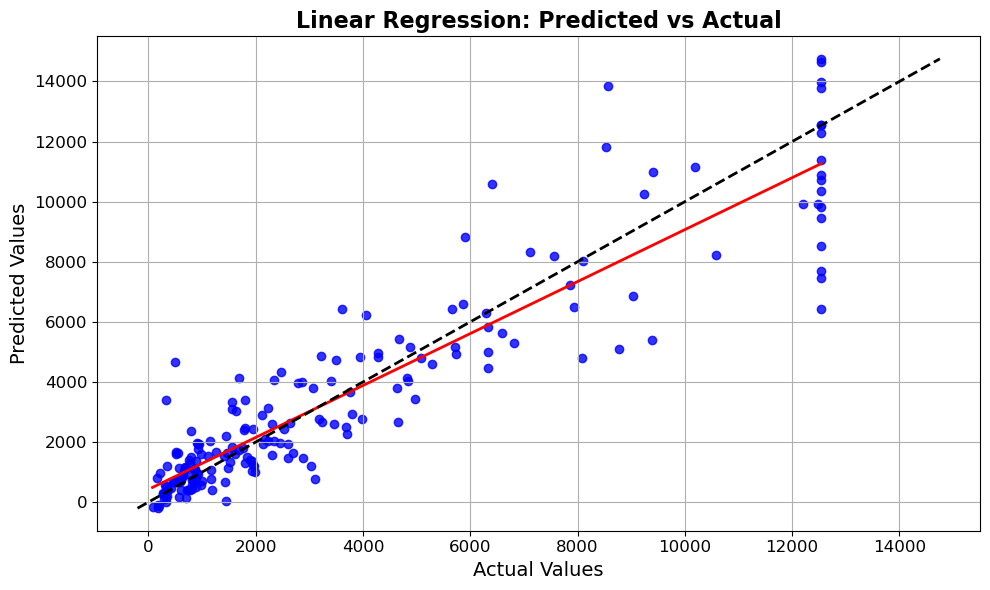

In [58]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_linear, ci=None, color='blue', marker='o', line_kws={'color': 'red', 'lw': 2})
plt.title('Linear Regression: Predicted vs Actual', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
max_val = max(np.max(y_test), np.max(y_pred_linear))
min_val = min(np.min(y_test), np.min(y_pred_linear))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error: {mae_linear:.2f}")

mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Mean Squared Error: {mse_linear:.2f}")

r2_linear = r2_score(y_test, y_pred_linear)
print(f"R-squared: {r2_linear:.2f}")

Mean Absolute Error: 1006.71
Mean Squared Error: 2213762.44
R-squared: 0.85


## Baging(LR)

In [60]:
from sklearn.ensemble import BaggingRegressor
base_estimator = LinearRegression()
bagging = BaggingRegressor(estimator=base_estimator,random_state=14 ,n_estimators=200)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

mae_linear = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_linear:.2f}")

mse_linear = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_linear:.2f}")

r2_linear_bagging = r2_score(y_test, y_pred_bagging)
print(f"R-squared: {r2_linear_bagging:.2f}")

Mean Absolute Error: 1010.12
Mean Squared Error: 2211464.64
R-squared: 0.85


## Boosting(LR)

In [61]:
from sklearn.ensemble import AdaBoostRegressor
boosting = AdaBoostRegressor(estimator=LinearRegression(), n_estimators=100, random_state=14)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

mae_linear = mean_absolute_error(y_test, y_pred_boosting)
print(f"Mean Absolute Error: {mae_linear:.2f}")

mse_linear = mean_squared_error(y_test, y_pred_boosting)
print(f"Mean Squared Error: {mse_linear:.2f}")

r2_linear_boosting = r2_score(y_test, y_pred_boosting)
print(f"R-squared: {r2_linear_boosting:.2f}")

Mean Absolute Error: 1019.47
Mean Squared Error: 2211840.44
R-squared: 0.85


- **`Linear Regression` achived 85% accuarcy** 

# Exploring additional machine learning models to improve accuracy:

## 2. Random Forest Regression

### a-Import Random Forest Regression Model
- importing the Random Forest model from sklearn library
- train the data using fit()
- predict the output using predict()

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=63)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=19)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

### b-Testing model accuarcy
- Create a scatter plot to visualize how the Random Forest model fits the data
- calculate :
- 1-mean_absolute_error
- 2-mean_squared_error
- 3-Score Matrix

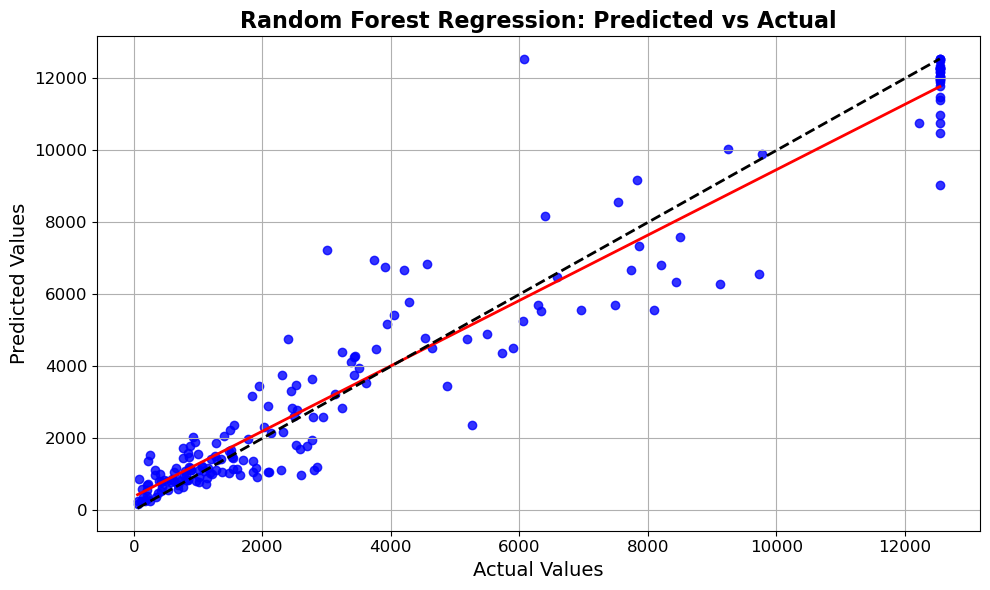

In [63]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_rf, ci=None, color='blue', marker='o', line_kws={'color': 'red', 'lw': 2})
plt.title('Random Forest Regression: Predicted vs Actual', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
max_val = max(np.max(y_test), np.max(y_pred_rf))
min_val = min(np.min(y_test), np.min(y_pred_rf))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [64]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error: {mae_rf:.2f}")

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf:.2f}")

r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2_rf:.2f}")

Mean Absolute Error: 733.30
Mean Squared Error: 1256758.39
R-squared: 0.93


## Bagging (RandomForestRegressor)

In [65]:
from sklearn.ensemble import BaggingRegressor
base_estimator = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=19)
bagging = BaggingRegressor(estimator=base_estimator,random_state=14 ,n_estimators=100)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_rf:.2f}")

mse_rf = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_rf:.2f}")

r2_rf_bagging = r2_score(y_test, y_pred_bagging)
print(f"R-squared: {r2_rf_bagging:.2f}")

Mean Absolute Error: 745.62
Mean Squared Error: 1292655.00
R-squared: 0.92


## Boosting(RandomForestRegressor)

In [66]:
from sklearn.ensemble import AdaBoostRegressor
boosting = AdaBoostRegressor(estimator=RandomForestRegressor(n_estimators=100 ,max_depth=10, random_state=19)
                             , n_estimators=100, random_state=14)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_boosting)
print(f"Mean Absolute Error: {mae_rf:.2f}")

mse_rf = mean_squared_error(y_test, y_pred_boosting)
print(f"Mean Squared Error: {mse_rf:.2f}")

r2_rf_bosting = r2_score(y_test, y_pred_boosting)
print(f"R-squared: {r2_rf_bosting:.2f}")

Mean Absolute Error: 775.41
Mean Squared Error: 1243198.00
R-squared: 0.93


- **`RandomForest Regression` achived 93% accuarcy** 

## 3. xgboost Regression

### a-Import xgboost Regression Model
- importing the xgboost model from sklearn library
- train the data using fit()
- predict the output using predict()

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=103)
xgb_model = XGBRegressor(enable_categorical=False, learning_rate=0.01, max_depth=5, n_estimators=300)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

### b-Testing model accuarcy
- Create a scatter plot to visualize how the xgboost model fits the data
- calculate :
- 1-mean_absolute_error
- 2-mean_squared_error
- 3-Score Matrix

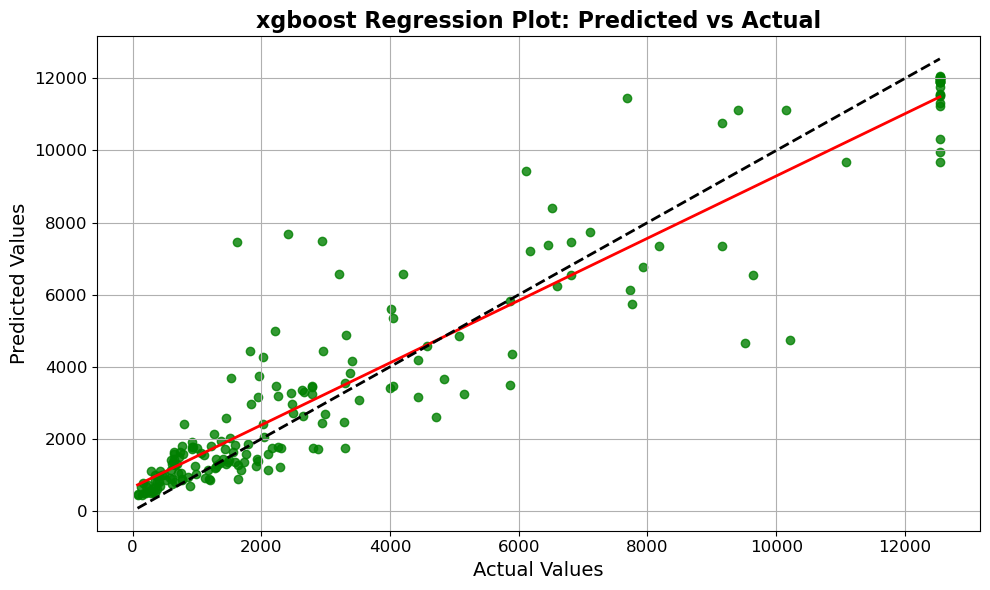

In [68]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_xgb, ci=None, color='green', marker='o', line_kws={'color': 'red', 'lw': 2})
plt.title('xgboost Regression Plot: Predicted vs Actual', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
max_val = max(np.max(y_test), np.max(y_pred_xgb))
min_val = min(np.min(y_test), np.min(y_pred_xgb))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [69]:
mae_xgboost = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error: {mae_xgboost:.2f}")

mse_xgboost = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error: {mse_xgboost:.2f}")

r2_xgboost = r2_score(y_test, y_pred_xgb)
print(f"R-squared: {r2_xgboost:.2f}")

Mean Absolute Error: 907.56
Mean Squared Error: 1816469.18
R-squared: 0.88


## Bagging(XGBRegressor)

In [70]:
from sklearn.ensemble import BaggingRegressor
base_estimator = XGBRegressor(enable_categorical=False, learning_rate=0.01, max_depth=5, n_estimators=300)
xgb_model.fit(x_train, y_train)
bagging = BaggingRegressor(estimator=base_estimator,random_state=14 ,n_estimators=200)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

mae_xgboost = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_xgboost:.2f}")

mse_xgboost = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_xgboost:.2f}")

r2_xgboost_bagging = r2_score(y_test, y_pred_bagging)
print(f"R-squared: {r2_xgboost_bagging:.2f}")

Mean Absolute Error: 902.59
Mean Squared Error: 1743088.15
R-squared: 0.89


## Boosting (XGBRegressor)

In [71]:
from sklearn.ensemble import AdaBoostRegressor
base_estimator = XGBRegressor(enable_categorical=False, learning_rate=0.01, max_depth=5, n_estimators=300)
boosting = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=14)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

mae_xgboost = mean_absolute_error(y_test, y_pred_boosting)
print(f"Mean Absolute Error: {mae_xgboost:.2f}")

mse_xgboost = mean_squared_error(y_test, y_pred_boosting)
print(f"Mean Squared Error: {mse_xgboost:.2f}")

r2_xgboost_boosting = r2_score(y_test, y_pred_boosting)
print(f"R-squared: {r2_xgboost_boosting:.2f}")

Mean Absolute Error: 997.16
Mean Squared Error: 1918237.60
R-squared: 0.88


- **`xgboost Regression` achived 89% accuarcy** 

# 4.Decision Tree Regression

### a-Import Decision Tree Regression Model
- importing the Decision Tree model from sklearn library
- train the data using fit()
- predict the output using predict()

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)
dt_model = DecisionTreeRegressor(max_depth=10, random_state=14)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

### b-Testing model accuarcy
- Create a scatter plot to visualize how the Decision Tree model fits the data
- calculate :
- 1-mean_absolute_error
- 2-mean_squared_error
- 3-Score Matrix

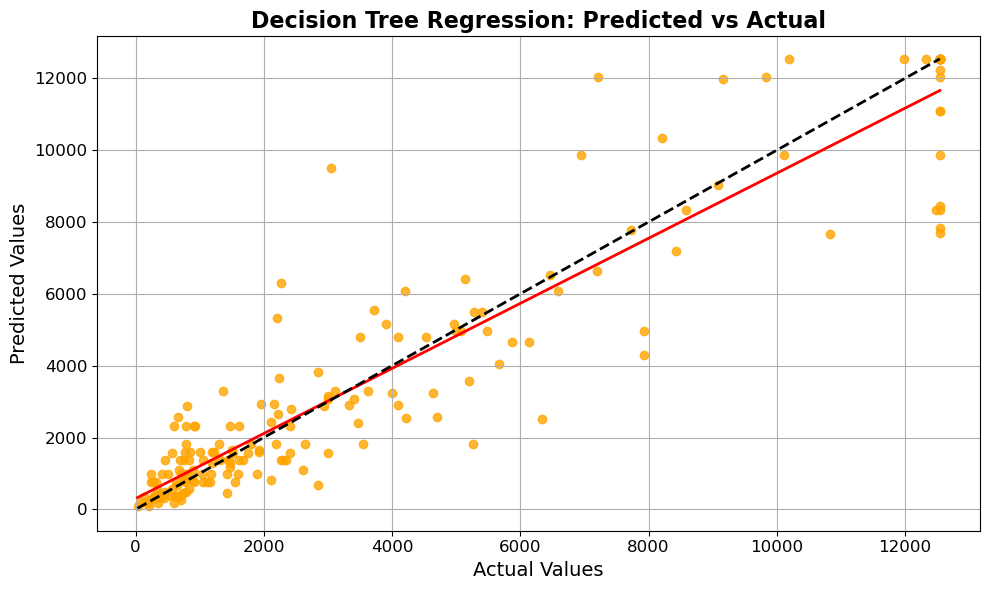

In [73]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_dt, ci=None, color='orange', marker='o', line_kws={'color': 'red', 'lw': 2})
plt.title('Decision Tree Regression: Predicted vs Actual', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
max_val = max(np.max(y_test), np.max(y_pred_dt))
min_val = min(np.min(y_test), np.min(y_pred_dt))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"Mean Absolute Error: {mae_dt:.2f}")

mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error: {mse_dt:.2f}")

r2_dt = r2_score(y_test, y_pred_dt)
print(f"R-squared: {r2_dt:.2f}")

Mean Absolute Error: 853.07
Mean Squared Error: 2022430.46
R-squared: 0.88


## Bagging (DecisionTreeRegressor)

In [75]:
from sklearn.ensemble import BaggingRegressor
base_estimator = DecisionTreeRegressor(max_depth=10, random_state=14)
bagging = BaggingRegressor(estimator=base_estimator,random_state=14 ,n_estimators=100)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

mae_dt = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_dt:.2f}")

mse_dt = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_dt:.2f}")

r2_dt_bagging = r2_score(y_test, y_pred_bagging)
print(f"R-squared: {r2_dt_bagging:.2f}")

Mean Absolute Error: 827.12
Mean Squared Error: 1527382.09
R-squared: 0.91


## Boosting (DecisionTreeRegressor)

In [76]:
from sklearn.ensemble import AdaBoostRegressor
base_estimator = DecisionTreeRegressor(max_depth=10, random_state=14)
boosting = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=14)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

mae_dt = mean_absolute_error(y_test, y_pred_boosting)
print(f"Mean Absolute Error: {mae_dt:.2f}")

mse_dt = mean_squared_error(y_test, y_pred_boosting)
print(f"Mean Squared Error: {mse_dt:.2f}")

r2_dt_boosting = r2_score(y_test, y_pred_boosting)
print(f"R-squared: {r2_dt_boosting:.2f}")

Mean Absolute Error: 777.46
Mean Squared Error: 1413909.30
R-squared: 0.92


- **`Decision Tree Regression` achived 92% accuarcy** 

# 5- GradientBoostingRegressor

### a-Import GradientBoosting Regression Model
- importing the GradientBoosting model from sklearn library
- train the data using fit()
- predict the output using predict()

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
gbm_model = GradientBoostingRegressor(n_estimators=100,
                                      random_state=27,
                                    learning_rate=0.2,
                                      max_depth=3,
                                      min_samples_split=5,
                                    min_samples_leaf=1,
                                      subsample=1)
gbm_model.fit(x_train, y_train)
y_pred_gbm = gbm_model.predict(x_test)

### b-Testing model accuarcy
- Create a scatter plot to visualize how the GradientBoosting model fits the data
- calculate :
- 1-mean_absolute_error
- 2-mean_squared_error
- 3-Score Matrix

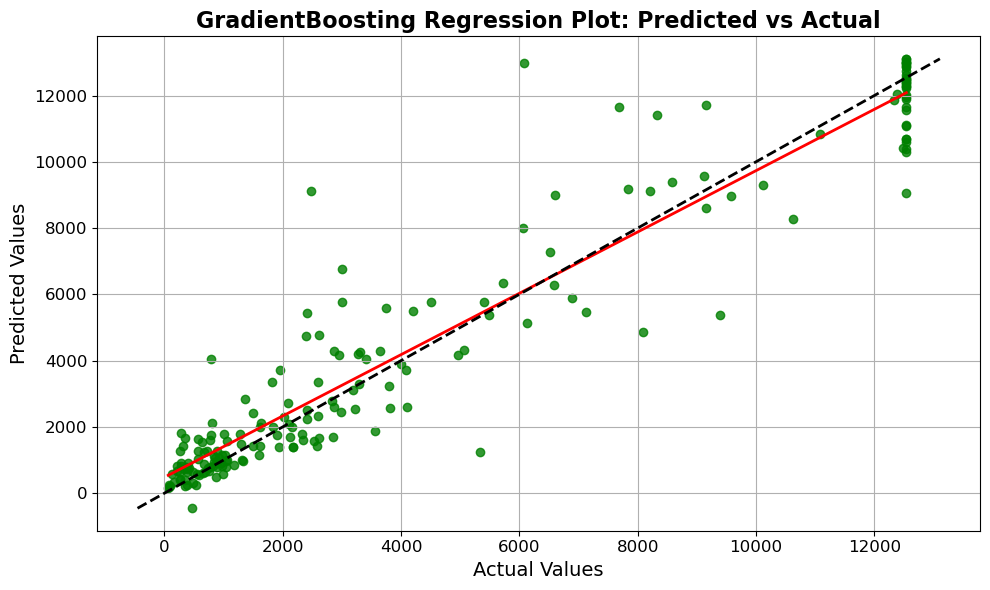

In [78]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_gbm, ci=None, color='green', marker='o', line_kws={'color': 'red', 'lw': 2})
plt.title('GradientBoosting Regression Plot: Predicted vs Actual', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
max_val = max(np.max(y_test), np.max(y_pred_gbm))
min_val = min(np.min(y_test), np.min(y_pred_gbm))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [79]:
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
print(f"Mean Absolute Error: {mae_gbm:.2f}")

mse_gbm = mean_squared_error(y_test, y_pred_gbm)
print(f"Mean Squared Error: {mse_gbm:.2f}")

r2_gbm = r2_score(y_test, y_pred_gbm)
print(f"R-squared: {r2_gbm:.2f}")

Mean Absolute Error: 846.58
Mean Squared Error: 1822908.08
R-squared: 0.91


## Bagging (GradientBoostingRegressor)

In [80]:
from sklearn.ensemble import BaggingRegressor
base_estimator = GradientBoostingRegressor(n_estimators=100,
                                      random_state=27,
                                    learning_rate=0.2,
                                      max_depth=3,
                                      min_samples_split=5,
                                    min_samples_leaf=1,
                                      subsample=1)
bagging = BaggingRegressor(estimator=base_estimator,random_state=14 ,n_estimators=100)
bagging.fit(x_train, y_train)
y_pred_bagging = bagging.predict(x_test)

mae_gbm = mean_absolute_error(y_test, y_pred_bagging)
print(f"Mean Absolute Error: {mae_gbm:.2f}")

mse_gbm = mean_squared_error(y_test, y_pred_bagging)
print(f"Mean Squared Error: {mse_gbm:.2f}")

r2_gbm_bagging = r2_score(y_test, y_pred_bagging)
print(f"R-squared: {r2_gbm_bagging:.2f}")

Mean Absolute Error: 843.66
Mean Squared Error: 1817169.12
R-squared: 0.91


## Boosting (GradientBoostingRegressor)

In [81]:
from sklearn.ensemble import AdaBoostRegressor
base_estimator = GradientBoostingRegressor(n_estimators=100,
                                      random_state=27,
                                    learning_rate=0.2,
                                      max_depth=3,
                                      min_samples_split=5,
                                    min_samples_leaf=1,
                                      subsample=1)
boosting = AdaBoostRegressor(estimator=base_estimator, n_estimators=100, random_state=14)
boosting.fit(x_train, y_train)
y_pred_boosting = boosting.predict(x_test)

mae_gbm = mean_absolute_error(y_test, y_pred_boosting)
print(f"Mean Absolute Error: {mae_gbm:.2f}")

mse_gbm = mean_squared_error(y_test, y_pred_boosting)
print(f"Mean Squared Error: {mse_gbm:.2f}")

r2_gbm_boosting = r2_score(y_test, y_pred_boosting)
print(f"R-squared: {r2_gbm_boosting:.2f}")

Mean Absolute Error: 890.58
Mean Squared Error: 1888965.27
R-squared: 0.91


- **`GradientBoosting Regression` achived 91% accuarcy** 

### Ploting all models accuarcy to predict best model


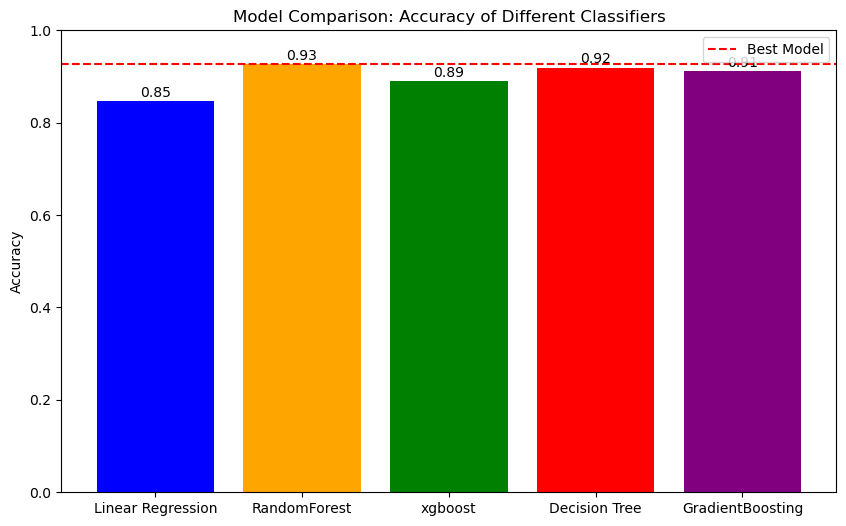

In [82]:
# Collecting accuracies and model names  
accuracies = [r2_linear,r2_rf,r2_xgboost_bagging,r2_dt_boosting,r2_gbm]  
models = ['Linear Regression','RandomForest',
'xgboost','Decision Tree','GradientBoosting']  

# Plotting  
plt.figure(figsize=(10, 6))  
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])  
plt.ylim(0, 1)  
plt.ylabel('Accuracy')  
plt.title('Model Comparison: Accuracy of Different Classifiers')  
plt.axhline(y=max(accuracies), color='red', linestyle='--', label='Best Model')  

# Adding accuracy values on top of bars  
for i, v in enumerate(accuracies):  
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')  

plt.legend()  
plt.show()

- The chart reveals that `Random Forest` led with an accuracy of **0.93**, while `Decision Tree` followed closely at **0.92**. `Gradient Boosting` improved to **0.91**, outperforming `XGBoost` at **0.89**. `Linear Regression` remained the lowest at **0.85**. Overall, `Random Forest` is the top performer.

### Project Summary: Analysis of Spotify's Most Streamed Songs

#### 1. **Objective**
The primary goal of this project is to analyze the dataset of Spotify's most streamed songs to understand the factors influencing their popularity and to build predictive models to estimate the number of playlists a song is featured in on Spotify.

#### 2. **Data Overview**
The dataset consists of 953 entries and 25 columns, including features such as:
- **Track_Name**: Name of the song
- **Artist_Name**: Name of the artist(s)
- **Released_Year**: Year of release
- **In_Spotify_Playlists**: Number of Spotify playlists the song is included in (target variable)
- **Streams**: Total number of streams on Spotify
- Various musical attributes (e.g., BPM, Danceability, Energy, Acousticness)

#### 3. **Data Preprocessing**
- **Data Cleaning**: 
  - Dropped irrelevant columns (`cover_url`, `released_month`, `released_day`).
  - Handled missing values by replacing them with the mode for categorical variables.
  - Converted object data types to categorical for better handling.
  
- **Feature Engineering**: 
  - Encoded categorical variables using label encoding to retain original text for visualization.
  - Dropped features with weak to moderate negative correlations with the target variable.

- **Normalization**: 
  - Scaled features to a common range using MinMaxScaler.

#### 4. **Exploratory Data Analysis (EDA)**
- **Visualizations**: 
  - Bar plots to show the top 10 most streamed songs, total streams per year, and top artists by total streams.
  - Heatmaps to visualize correlations between numerical variables.
  - Scatter plots to explore relationships between features (e.g., Danceability vs. Energy).
  - Box plots to analyze the distribution of streams by release year.
  - Pie charts to show the distribution of songs based on the number of contributing artists and mode (Major/Minor).
  - Word clouds to visualize common words in song titles.
  - Histograms to examine the distribution of BPM.

#### 5. **Modeling**
- **Target Variable**: Chose `In_Spotify_Playlists` as the target variable.
- **Train-Test Split**: Divided the dataset into training and testing sets (80/20 split).
- **Machine Learning Models**: 
  - Implemented various regression models including:
    - Linear Regression
    - Random Forest Regression
    - XGBoost Regression
    - Decision Tree Regression
    - Gradient Boosting Regression
  - Used Bagging and Boosting techniques to enhance model performance.

#### 6. **Model Evaluation**
- **Performance Metrics**: Evaluated models using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared values.
- **Results**:
  - **Linear Regression**: R-squared = 0.85
  - **Random Forest Regression**: R-squared = 0.93 (best performer)
  - **XGBoost Regression**: R-squared = 0.89
  - **Decision Tree Regression**: R-squared = 0.92
  - **Gradient Boosting Regression**: R-squared = 0.91

#### 7. **Conclusion**
The analysis revealed that the Random Forest model outperformed other models with an accuracy of 93%. The project successfully identified key factors influencing song popularity on Spotify and established a robust predictive model for estimating playlist inclusion. Future work could involve further tuning of models and exploring additional features to enhance predictive accuracy. 

This project highlights the importance of data preprocessing, exploratory analysis, and model evaluation in deriving meaningful insights from complex datasets.